In [5]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
X = df.loc[:, (df.columns != "alive")&(df.columns != "survived")]
X = pd.get_dummies(X, drop_first=True)
y = df["survived"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
import lightgbm as lgb

model = lgb.LGBMClassifier(data_sample_strategy="goss", max_depth=5, random_state=0)


In [12]:
eval_set = [(X_test, y_test)]
call_backs = []
call_backs.append(lgb.early_stopping(stopping_rounds=10))
call_backs.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=call_backs)

[LightGBM] [Info] Number of positive: 247, number of negative: 376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396469 -> initscore=-0.420201
[LightGBM] [Info] Start training from score -0.420201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.610578
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.57659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.548428
[LightGBM] [Warnin

LGBMClassifier(data_sample_strategy='goss', max_depth=5, random_state=0)

In [13]:
from sklearn import metrics

y_pred_praba = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred_praba)

0.39521437419387756

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

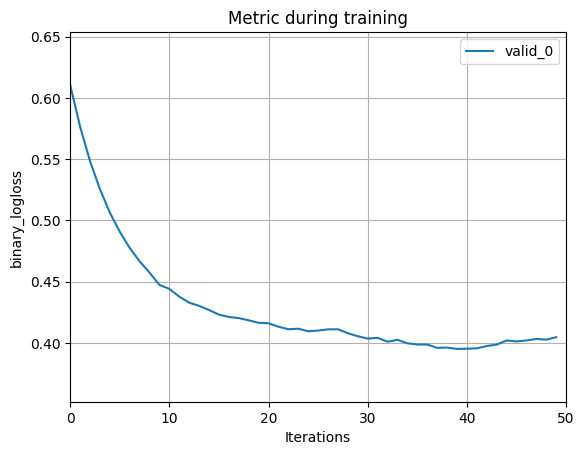

In [14]:
lgb.plot_metric(model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

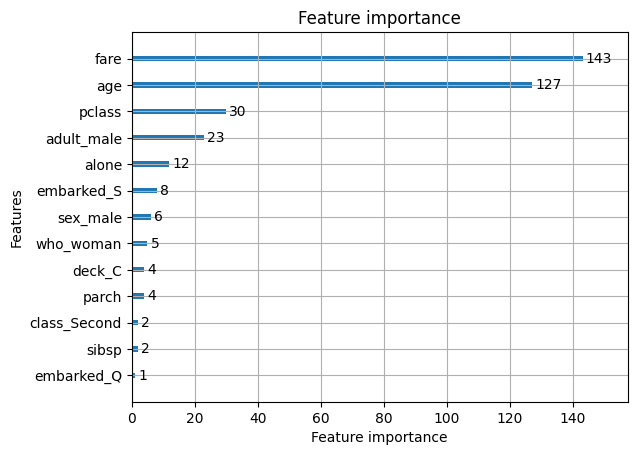

In [16]:
lgb.plot_importance(model)